In [2]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *
from plotsettings import *

import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

# Source

In [11]:
folder = "data/data_191028_153030_blue_Nq10_Nt1_Om1.0_wd5.208_wq6.5_sft-0.085_wc4.0_g0.2_wsb0.0056"

## Get data

In [12]:
home = os.getcwd() + "/"
srcfolder = home + folder
ID = getID(srcfolder)
Nq, Nc, Nt, wq, shift, wc, Ec, g, sb, t0, t1, t2, t3, tg, anh_appr, gauss, smooth, Q, convergent, Np, H, psi0, e_ops, options, eps, wd, epsq, epsc, dw, wdq, wdc = getparams(srcfolder)
quants = getquants(srcfolder)
times, states, expect, e0, g1, e1, g0, coupling = load_data(quants, srcfolder)
if Nt == 1:
    H_args = {'t0' : t0, 't1' : t1, 't2' : t2, 't3' : t3, 'tg' : tg, 'Q'  : Q,
              'gauss' : gauss, 'smooth' : smooth, 'convergent' : convergent, 'Nt' : Nt, 'wd' : wd}
elif Nt == 2:
    H_args = {'t0' : t0, 't1' : t1, 't2' : t2, 't3' : t3, 'tg' : tg, 'Q'  : Q, 'gauss' : gauss,
              'smooth' : smooth, 'convergent' : convergent, 'Nt' : Nt, 'wdq' : wdq, 'wdc' : wdc}

In [13]:
""" SIDEBAND COUPLING """

smoothen_method = 'savgol'

if 'e0' in quants:
    e0_macro, e0_macro_times = remove_micromotion(e0, times, method=smoothen_method)
if 'g0' in quants:
    g0_macro, g0_macro_times = remove_micromotion(g0, times, method=smoothen_method)
if 'e1' in quants:
    e1_macro, e1_macro_times = remove_micromotion(e1, times, method=smoothen_method)
if 'g1' in quants:
    g1_macro, g1_macro_times = remove_micromotion(g1, times, method=smoothen_method)
if ('e1' in quants and 'g0' in quants):
    e1g0_macro, e1g0_macro_times = remove_micromotion(e1-g0, times, method=smoothen_method)
if ('e0' in quants and 'g1' in quants):
    e0g1_macro, e0g1_macro_times = remove_micromotion(e0-g1, times, method=smoothen_method)

if sb == 'red':
    wsb = sideband_freq(e0g1_macro, e0g1_macro_times)
elif sb == 'blue':
    wsb = sideband_freq(e1g0_macro, e1g0_macro_times)

print("wsb =", wsb/2/pi, "GHz")

wsb = 0.005602756611385029 GHz


## Visualize data

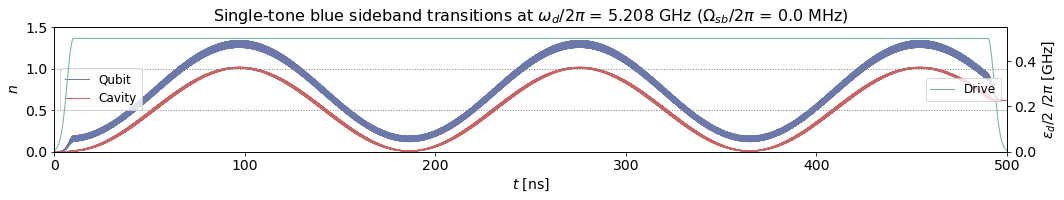

In [14]:
""" EXPECTATION VALUES """
wsb=0
xlim = None
ylim = None

if sb == 'red':
    if Nt == 1:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                          wd=wd, wsb=wsb, eps=eps)
    elif Nt == 2:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                          wsb=wsb, epsq=epsq, epsc=epsc)
elif sb == 'blue':
    if Nt == 1:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                          wd=wd, wsb=wsb, eps=eps)
    elif Nt == 2:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                          wsb=wsb, epsq=epsq, epsc=epsc)

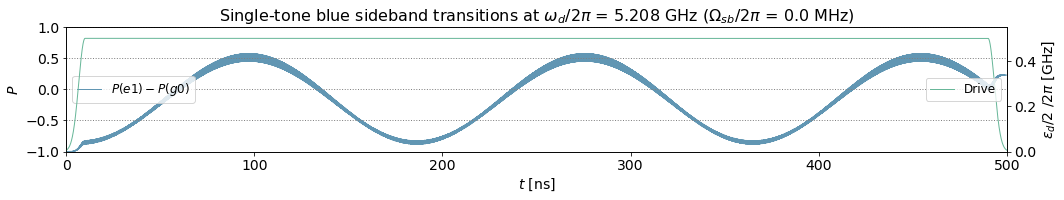

In [15]:
"""COMBINED PROBABILITIES"""

xlim = None#[0, 3]
ylim = None#[0.99, 1.01]

if sb == 'red':
    if Nt == 1:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                                e0=e0, g1=g1, wd=wd, wsb=wsb, eps=eps)
    elif Nt == 2:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                                e0=e0, g1=g1, wsb=wsb, epsq=epsq, epsc=epsc)
elif sb == 'blue':
    if Nt == 1:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                                e1=e1, g0=g0, wd=wd, wsb=wsb, eps=eps)
    elif Nt == 2:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                                e1=e1, g0=g0, wsb=wsb, epsq=epsq, epsc=epsc)

# Play around

In [29]:
infile = open(srcfolder + "/times.pkl", 'rb')
data = pkl.load(infile)
print(data)
infile.close()

{'quantity': 'times', 'data': array([20.        , 20.33333333, 20.66666667, 21.        , 21.33333333,
       21.66666667, 22.        , 22.33333333, 22.66666667, 23.        ,
       23.33333333, 23.66666667, 24.        , 24.33333333, 24.66666667,
       25.        , 25.33333333, 25.66666667, 26.        , 26.33333333,
       26.66666667, 27.        , 27.33333333, 27.66666667, 28.        ,
       28.33333333, 28.66666667, 29.        , 29.33333333, 29.66666667,
       30.        ])}
